## Ultimate Technologies Inc.

### Part 1 ‐ Exploratory data analysis

The logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

### Loading Libraries and Data Wrangling

In [45]:
%matplotlib inline
import pandas as pd
import json
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
from pylab import plot, show, text
import datetime
import matplotlib.dates as mdates
import pylab

In [46]:
# Read the json file
df_logins = pd.read_json('logins.json')
df_logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


Let's check how many entries do we have and if there are any null values.

In [47]:
df_logins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.4 MB


Let's get some more information about our dataset.

In [48]:
df_logins.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


Let's create a new column 'count'.

In [49]:
df_logins['count'] = 1
df_logins = df_logins.set_index('login_time')
df_logins.sort_index(inplace = True)
df_logins.head(10)

,count
login_time,
1970-01-01 20:12:16,1
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:36,1
1970-01-01 20:16:37,1
1970-01-01 20:21:41,1
1970-01-01 20:26:05,1
1970-01-01 20:26:21,1
1970-01-01 20:31:03,1


In [50]:
# A Grouper allows the user to specify a groupby instruction for a target object. 
# So as you can see, the first interval had only 2 values, thus the count column now displays 2
df_logins_grouped = df_logins.groupby(pd.Grouper(freq='15Min')).aggregate(np.sum) 
df_logins_grouped['count'] = df_logins_grouped['count'].fillna(0)
df_logins_grouped.head(10)

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
1970-01-01 21:15:00,4
1970-01-01 21:30:00,0
1970-01-01 21:45:00,4
1970-01-01 22:00:00,9


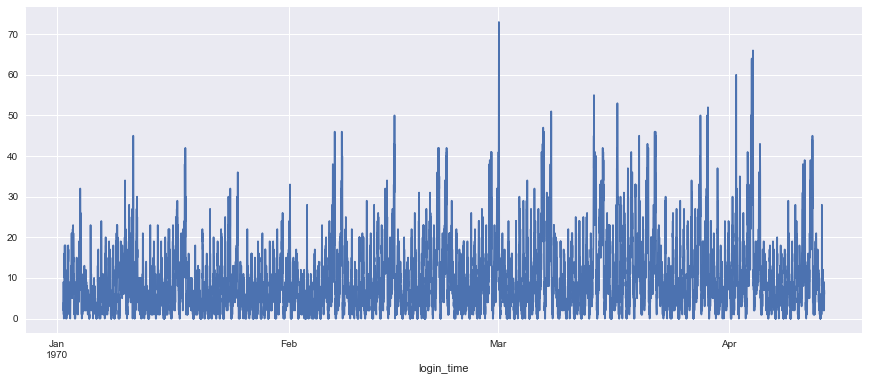

In [56]:
plt.figure(figsize=(15,6))
df_logins_grouped['count'].plot()

I notice two things from the chart above:
1) There is a cyclical trend in logins with distinct spikes.
2) The month March had the highest number of logins which makes us want to understand what must have cause that spike.

We also want to see if there are certain days of a week when the spikes happen, may be weekends or certain hours in a day when the login count rises up. This knowledge can benefit Utlimate Technologies Inc. in so many ways.

In [60]:
import calendar

day = list(calendar.day_abbr)
month = list(calendar.month_abbr)

In [57]:
df_logins_grouped['timestamp'] = pd.to_datetime(df_logins_grouped.index)

In [61]:
df_logins_grouped['month'] = df_logins_grouped['timestamp'].apply(lambda x: month[x.month])
df_logins_grouped['day'] = df_logins_grouped['timestamp'].apply(lambda x: day[x.weekday()])
df_logins_grouped['hour'] = df_logins_grouped['timestamp'].apply(lambda x: x.hour)
df_logins_grouped['time'] = df_logins_grouped['timestamp'].apply(lambda x: x.time())

In [62]:
df_logins_grouped.head()

,count,timestamp,month,day,hour,time
login_time,,,,,,
1970-01-01 20:00:00,2,1970-01-01 20:00:00,Jan,Thu,20,20:00:00
1970-01-01 20:15:00,6,1970-01-01 20:15:00,Jan,Thu,20,20:15:00
1970-01-01 20:30:00,9,1970-01-01 20:30:00,Jan,Thu,20,20:30:00
1970-01-01 20:45:00,7,1970-01-01 20:45:00,Jan,Thu,20,20:45:00
1970-01-01 21:00:00,1,1970-01-01 21:00:00,Jan,Thu,21,21:00:00


Let's see which day has the most number of logins.

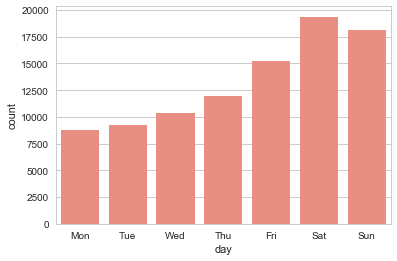

In [68]:
login_count_day = df_logins_grouped.groupby('day')['count'].sum()

sns.set(style="whitegrid")
sns.barplot(x=login_count_day.index, y=login_count_day, order=day, color="salmon")

**Note**

1. Saturday is the most popular day for users followed by Sunday and Friday respectively. 
2. Monday shows the least activity.

This means the company attracts most logins during the weekends and any decisions such as mentioned below can be taken keeping this information in mind:
- When to do maintainence of the systems or 
- Have more support staff available or
- Rolling out a new feature or
- Launching any offers

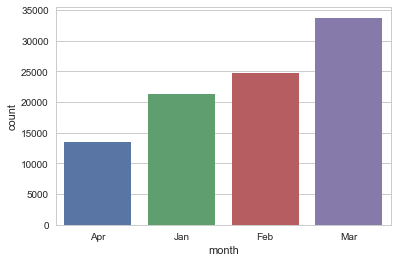

In [85]:
month_counts = df_logins_grouped.groupby('month')['count'].sum().sort_values()
sns.barplot(x=month_counts.index, y=month_counts)

As we can see, the logins have continued to increase over the months which indicates that the company is growing and acquiring more and more users each month. This information should be taken into consideration when planning on scaling operations and offerings.

In [86]:
login_count_hour = df_logins_grouped.groupby('hour')['count'].sum()

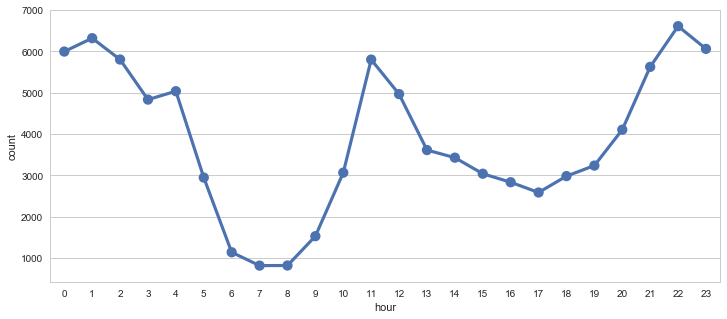

In [88]:
plt.figure(figsize=(12,5))
sns.pointplot(x=login_count_hour.index, y=login_count_hour)

The graph above shows us the amount of activity recorded every hour of the day.

1. The platform records maximum activity between 10 PM and 1 AM.
2. There is also a sharp rise in user activity around 11 AM.

This tells us when we maximize our target user count with the necessary advertisements or offers. 

### Part 2 ‐ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

**Choice of Metrics**

Note: Let's assume the following:
1. The demand of cabs in Gotham during the night is the same as the demand of cabs in Metropolis during the day.
2. The population in both the cities is roughly the same.

We know that the demand in both the cities is complementary in the weekdays; i.e the demand for both cities can be met by the same driver partners as they are at different times. Therefore, if this experiment was indeed sucessful, it would indicate that the drivers, irrespective of which city they belong to, will be willing to go on the other side of the bridge.

The key measure of success as per me would be the number of rides where the originating is Gotham or Metropolis and the destination is the other city, let's call such rides as 'successrides'. If we see a substantial increase in number of such rides, we can assume that driver partners are becoming available in both cities and the experiment is successful.


**Experiment**

These are the steps I will implement as part of an experiment to deduce if the policy changes have the desired affect on the behavior of partner drivers.

1. To begin with, we will track the number of 'successrides' from each city i.e. if there are 20 rides where origination of the ride is from Gotham and the destination is Metropolis then we mark 20 against Gotham and vice-versa.

2. Conduct the experiment now i.e. removing the tolls and see if the count of 'successrides' has increased for these two cities.

**Statistical Testing:**

Once you have both the datasets, perform hypothesis testing using the Difference of Proportions test on the two samples. Calculate the Z-Statisitc and the p-value and compare it with an arbritrary significance level, $\alpha$.
If the Null Hypothesis holds, it implies that the experiment has been a failure. If the Alternate hypothesis holds, it implies that it has been a success.

I will perform the experiment described above and test if the Null Hypothesis can be rejected for both the cities. If this is true, then I will suggest Ultimate Inc to move forward with implementing the policy change. If it cannot be rejected, then I will suggest that they stop and look for other potent options.

**Caveats** 

One thing to keep in mind is the time of the year/month when the experiment can be conducted or was conducted. External influencers can result in incorrect outcomes. For instance:
- Music festivals or events in the other city
- Summer breaks
- New companies opening in either of the cities
- New Tourist attractions opening in a city

### Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

In [99]:
data = open('ultimate_data_challenge.json', 'r').readline()
data = json.loads(data)

In [100]:
df = pd.DataFrame(data)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [102]:
df['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

iPhone is more popular than Android phone but we also see some null values in the Phone field, so let's fix that.

In [104]:
df['phone'] = df['phone'].fillna('iPhone')

In [105]:
df['avg_rating_by_driver'].describe()

count    49799.000000
mean         4.778158
std          0.446652
min          1.000000
25%          4.700000
50%          5.000000
75%          5.000000
max          5.000000
Name: avg_rating_by_driver, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


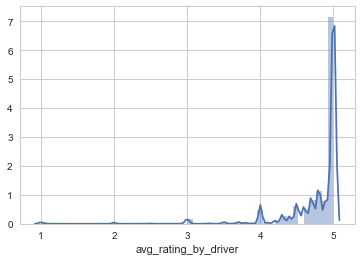

In [108]:
sns.distplot(df[df['avg_rating_by_driver'].notnull()]['avg_rating_by_driver'])

In [111]:
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean())

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


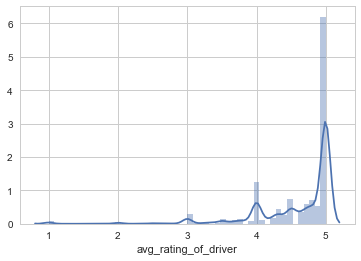

In [114]:
sns.distplot(df[df['avg_rating_of_driver'].notnull()]['avg_rating_of_driver'])

In [115]:
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean())

In [106]:
df['avg_surge'].describe()

count    50000.000000
mean         1.074764
std          0.222336
min          1.000000
25%          1.000000
50%          1.000000
75%          1.050000
max          8.000000
Name: avg_surge, dtype: float64

In [107]:
df['trips_in_first_30_days'].describe()

count    50000.000000
mean         2.278200
std          3.792684
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        125.000000
Name: trips_in_first_30_days, dtype: float64